In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#warnings.filterwarnings("ignore", category=DataConversionWarning)

#from warnings import simplefilter
#from sklearn.exceptions import ConvergenceWarning
#simplefilter("ignore", category=ConvergenceWarning)


In [3]:
df = pd.read_excel('UPCAT_DATA2(2).xlsx', sheet_name='AllData')
df

,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2,Target
0,2005,77,82.0,86,94,87,92.0,84,80,92,1.4764,1.5045,1.40980,1,55.0,28,1,4.0,1
1,2005,57,57.0,59,55,46,57.0,53,45,53,2.6557,2.7000,2.70080,1,38.0,19,5,3.0,0
2,2005,55,52.0,55,57,53,51.0,57,62,51,2.6132,2.6818,2.71720,0,17.0,9,5,6.0,0
3,2005,69,78.0,78,87,79,79.0,83,82,79,1.7217,1.6136,1.70490,1,45.0,28,1,4.0,0
4,2005,64,71.0,68,71,57,54.0,60,59,55,2.4245,2.4318,2.47130,1,67.0,56,1,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2014,53,56.0,52,55,52,58.0,63,51,51,2.5577,2.6089,2.72984,1,26.0,23,1,5.0,0
1006,2014,59,67.0,57,71,61,64.0,67,63,67,2.4135,2.3589,2.32258,0,24.0,30,1,4.0,0
1007,2014,84,83.0,85,93,89,92.0,89,96,93,1.5192,1.4597,1.43952,0,86.0,72,1,4.0,1
1008,2014,78,83.0,77,82,62,69.0,84,71,70,1.7115,1.9556,2.02016,0,72.0,48,1,4.0,0


# Handling Missing Data

It can be seen that only a few rows have missing values, therefore we can drop these rows while still getting hold of most of the information. Another approach is to impute the data. We can try out different ways to impute the data.

In [14]:
df.isna().sum()

Batch     0
Eng7      0
Eng8      1
Eng9      0
Math7     0
Math8     0
Math9     1
Sci7      0
Sci8      0
Sci9      0
GWA7      0
GWA8      0
GWA9      1
UP        0
IQ        1
SA        0
C1        0
C2        2
Target    0
dtype: int64

In [22]:
def nan_imputer(df, mode='mean'):
    cols = df.columns

    from sklearn.impute import SimpleImputer

    imputer = SimpleImputer(missing_values=np.nan, strategy=mode)
    imputer.fit(df.values)
    df_new = pd.DataFrame(imputer.transform(df.values), columns=cols)
    return df_new

In [23]:
df_new = nan_imputer(df)
df_new

,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2,Target
0,2005.0,77.0,82.0,86.0,94.0,87.0,92.0,84.0,80.0,92.0,1.4764,1.5045,1.40980,1.0,55.0,28.0,1.0,4.0,1.0
1,2005.0,57.0,57.0,59.0,55.0,46.0,57.0,53.0,45.0,53.0,2.6557,2.7000,2.70080,1.0,38.0,19.0,5.0,3.0,0.0
2,2005.0,55.0,52.0,55.0,57.0,53.0,51.0,57.0,62.0,51.0,2.6132,2.6818,2.71720,0.0,17.0,9.0,5.0,6.0,0.0
3,2005.0,69.0,78.0,78.0,87.0,79.0,79.0,83.0,82.0,79.0,1.7217,1.6136,1.70490,1.0,45.0,28.0,1.0,4.0,0.0
4,2005.0,64.0,71.0,68.0,71.0,57.0,54.0,60.0,59.0,55.0,2.4245,2.4318,2.47130,1.0,67.0,56.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2014.0,53.0,56.0,52.0,55.0,52.0,58.0,63.0,51.0,51.0,2.5577,2.6089,2.72984,1.0,26.0,23.0,1.0,5.0,0.0
1006,2014.0,59.0,67.0,57.0,71.0,61.0,64.0,67.0,63.0,67.0,2.4135,2.3589,2.32258,0.0,24.0,30.0,1.0,4.0,0.0
1007,2014.0,84.0,83.0,85.0,93.0,89.0,92.0,89.0,96.0,93.0,1.5192,1.4597,1.43952,0.0,86.0,72.0,1.0,4.0,1.0
1008,2014.0,78.0,83.0,77.0,82.0,62.0,69.0,84.0,71.0,70.0,1.7115,1.9556,2.02016,0.0,72.0,48.0,1.0,4.0,0.0


No more NaNs!

In [24]:
df_new.isna().sum()

Batch     0
Eng7      0
Eng8      0
Eng9      0
Math7     0
Math8     0
Math9     0
Sci7      0
Sci8      0
Sci9      0
GWA7      0
GWA8      0
GWA9      0
UP        0
IQ        0
SA        0
C1        0
C2        0
Target    0
dtype: int64

# Load UPCAT Data

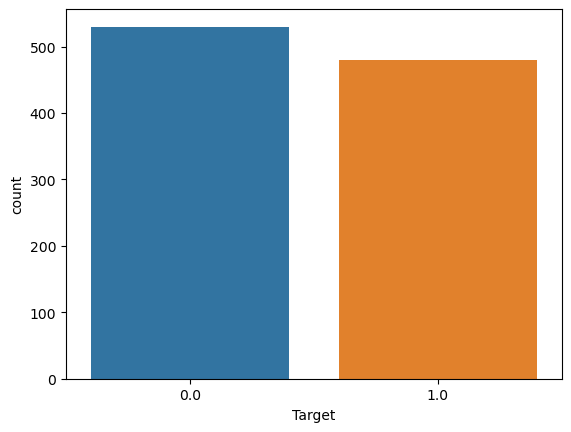

In [25]:
sns.countplot(df_new['Target'], label='Count')
plt.show()

# PCC

In [35]:
N = df_new.shape[0]
n_pass = df_new.groupby('Target')['GWA7'].count()[1]
n_fail = df_new.groupby('Target')['GWA7'].count()[0]
PCC = (n_pass/N)**2 + (n_fail / N)**2
print(f'PCC = {PCC * 100 : .2f}',
      f'\nMinimum Acceptable Prediction Score = {125*PCC: .2f}')


PCC =  50.12 
Minimum Acceptable Prediction Score =  62.65


# Handling of Categorical

in this case we do not have Categorical variables. Otherwise, do OHE or ordinal conversion

# Scaling Function

Note that we scale only on the splitting of the data, specifically on the **FULL TRAIN SET**. We will use sklearn's `MinMaxScaler` from `sklearn.preprocessing`

In [67]:
from sklearn.preprocessing import MinMaxScaler
MM_scaler = MinMaxScaler()

# Train Test Split

In [65]:
X = df_new.drop('Target', axis=1)
y = df_new.loc[:, 'Target']

In [131]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                              y,
                                                             test_size=0.2,
                                                              random_state=1337)
# scale the X_train_full and X_test
X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

X_test_scaled = MM_scaler.transform(X_test.astype(float))


array([[0.55555556, 0.82692308, 0.84848485, ..., 0.89473684, 0.        ,
        0.375     ],
       [0.22222222, 0.55769231, 0.74242424, ..., 0.58947368, 0.        ,
        0.375     ],
       [0.55555556, 0.36538462, 0.40909091, ..., 0.11578947, 0.        ,
        0.375     ],
       ...,
       [0.88888889, 0.48076923, 0.57575758, ..., 0.66315789, 0.        ,
        0.375     ],
       [0.11111111, 0.73076923, 0.75757576, ..., 0.82105263, 0.        ,
        0.5       ],
       [0.11111111, 0.5       , 0.59090909, ..., 0.90526316, 0.        ,
        0.5       ]])

# Classifier AutoML

## KNN

In [130]:
n_trials = 20
def clf_knn(X, y, max_k=70):
    import time
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import MinMaxScaler
    start_time = time.time()
    score_train = []
    score_val = []
    
    for seed in range(n_trials):
        X_train, X_val, y_train, y_val = train_test_split(X,
                                                          y,
                                                          test_size=0.25,
                                                          random_state=seed)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train.astype(float))
        X_val = scaler.transform(X_val.astype(float))
        
        neighbors_settings = range(1,max_k+1)
        acc_train = []
        acc_val = []
        
        for k in neighbors_settings:
            clf = KNeighborsClassifier(n_neighbors=k)
            clf.fit(X_train, y_train)
            acc_train.append(clf.score(X_train, y_train))
            acc_val.append(clf.score(X_val, y_val))
            
        score_train.append(acc_train)
        score_val.append(acc_val)
        
    score_val_means = np.mean(score_val, axis=0)
    score_train_means = np.mean(score_train, axis=0)
    
    best_k = np.argmax(score_val_means)
    best_acc_val = score_val_means[best_k]
    best_acc_train = score_train_means[best_k]
    
    
    params = 'k neighbors'
    run_time = time.time() - start_time
    
    model_test = KNeighborsClassifier(n_neighbors=best_k).fit(X, y)
    score_test = model_test.score(X_test_scaled, y_test) #X_test and y_test are variables outside the function
    
    # Plotting error bars
    
    plt.errorbar(neighbors_settings, np.mean(score_train, axis=0),
             yerr=np.std(score_train, axis=0)/2, label="training accuracy")
    plt.errorbar(neighbors_settings, np.mean(score_val, axis=0),
                 yerr=np.std(score_val, axis=0)/6, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()
    plt.show()
    'Model, params, bestparam, trainacc, valacc, testacc, top pred, runtime'
    return ['KNN', params, best_k, best_acc_train, best_acc_val, score_test, 'NA', run_time]
    

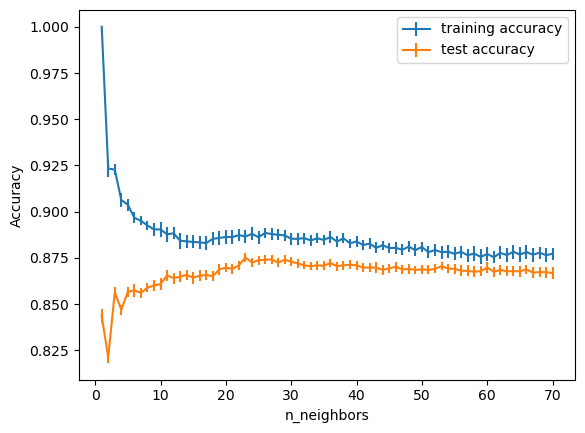

['KNN',
 'k neighbors',
 22,
 0.8865511551155116,
 0.8752475247524754,
 0.8712871287128713,
 'NA',
 55.42441749572754]

In [128]:
clf_knn(X_train_full_scaled, y_train_full)

## SVC (l1 or l2)

In [190]:
def train_svm(X, y, mode):
    from sklearn.svm import LinearSVC
    import time
    from sklearn.preprocessing import MinMaxScaler
    start_time = time.time()
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_val = []
    
    
    for seed in range(n_trials):
        training_accuracy = []  
        val_accuracy = []
        X_train, X_val, y_train, y_val = train_test_split(X,
                                                         y,
                                                         test_size=0.25,
                                                         random_state=seed)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train.astype(float))
        X_val = scaler.transform(X_val.astype(float))
        
        for alpha_run in C:
            if mode == 'l1':
                svc = LinearSVC(C=alpha_run, penalty=mode, loss='squared_hinge', dual=False).fit(X_train, y_train)
            if mode == 'l2':
                svc = LinearSVC(C=alpha_run, penalty=mode).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            val_accuracy.append(svc.score(X_val, y_val))
           # if alpha_run == 0.01:
            
                
        score_train.append(training_accuracy)
        score_val.append(val_accuracy)
 

    score_val_means = np.mean(score_val, axis=0)
    score_train_means = np.mean(score_train, axis=0)
    
    best_c_idx = np.argmax(score_val_means)
    best_C = C[best_c_idx]
    best_acc_val = score_val_means[best_c_idx]
    best_acc_train = score_train_means[best_c_idx]
    
    # test model in test set
    model_test = LinearSVC(C=best_C).fit(X, y)
    score_test = model_test.score(X_test_scaled, y_test) #X_test and y_test are variables outside the function
    top_pred =''
    coefs = model_test.coef_[0]
    top_pred = X_test.columns[np.argmax(np.abs(coefs))]
    
    # plot error bars
    plt.errorbar(np.arange(len(np.mean(score_train, axis=0))), np.mean(score_train, axis=0),
             yerr=np.std(score_train, axis=0)/2, label="training accuracy")
    plt.errorbar(np.arange(len(np.mean(score_train, axis=0))), np.mean(score_val, axis=0),
                 yerr=np.std(score_val, axis=0)/6, label="test accuracy")
    plt.xticks(np.arange(len(np.mean(score_train, axis=0))), labels=C, rotation=90)

    plt.ylabel("Accuracy")
    plt.xlabel("C")
    plt.legend()
    plt.show()
    
    
    fig, ax = plt.subplots()
    ax.barh(np.arange(len(coefs)), sorted(np.abs(coefs)))
    ax.set_yticks(np.arange(len(coefs)))
    ax.set_yticklabels(X_test.columns[np.argsort(np.abs(coefs))])
    plt.show()
    
    print(score_val_means)
    
#     top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
#     abs_mean_coefs = np.abs(mean_coefs[0,:])
#     coefs_count = len(abs_mean_coefs)
#     fig, ax = plt.subplots(figsize=(3,7))
#     ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
#     ax.set_yticks(np.arange(coefs_count))
#     ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    'Model, params, bestparam, trainacc, valacc, testacc, top pred, runtime'
    return ['Linear SVM ({0})'.format(mode), 'C', best_C,
            best_acc_train, best_acc_val, score_test, top_pred, run_time]


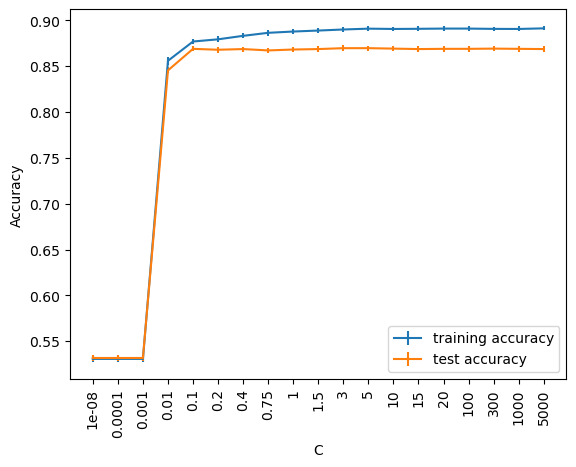

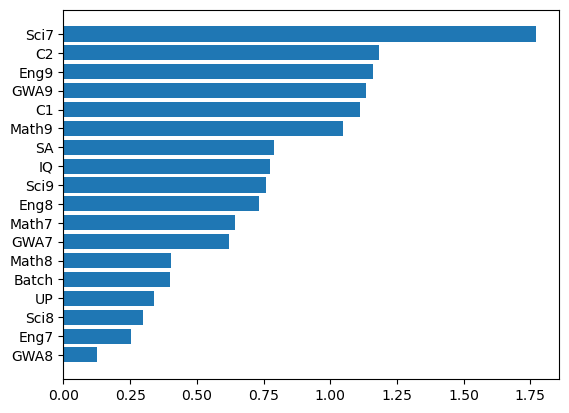

[0.53168317 0.53168317 0.53168317 0.84554455 0.86905941 0.86806931
 0.86881188 0.86732673 0.86831683 0.86881188 0.86980198 0.86980198
 0.86930693 0.86881188 0.86905941 0.86905941 0.86930693 0.86905941
 0.86881188]


['Linear SVM (l1)',
 'C',
 3,
 0.8901815181518152,
 0.86980198019802,
 0.8762376237623762,
 'Sci7',
 5.839414358139038]

In [193]:
train_svm(X_train_full_scaled, y_train_full, 'l1')

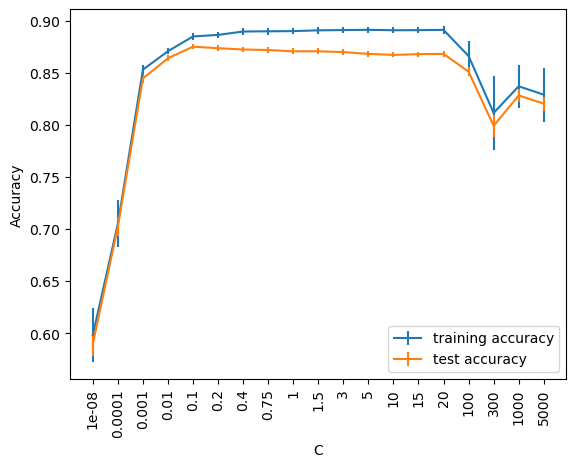

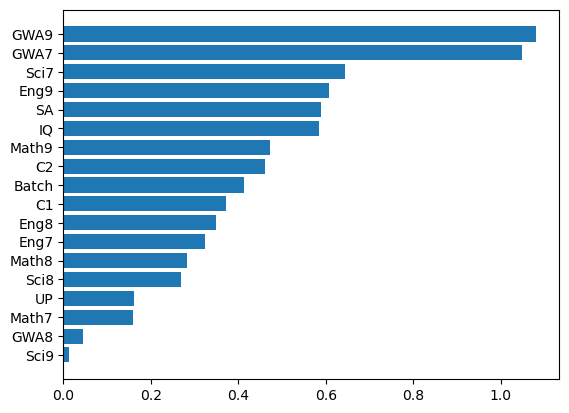

[0.58985149 0.70247525 0.84480198 0.86410891 0.87524752 0.87376238
 0.87252475 0.8720297  0.87079208 0.87079208 0.8700495  0.86831683
 0.86732673 0.86806931 0.86831683 0.85123762 0.79925743 0.82846535
 0.82054455]


['Linear SVM (l2)',
 'C',
 0.1,
 0.8850660066006599,
 0.8752475247524754,
 0.8712871287128713,
 'GWA9',
 3.846745729446411]

In [194]:
train_svm(X_train_full_scaled, y_train_full, 'l2')

In [152]:
X_test.columns

Index(['Batch', 'Eng7', 'Eng8', 'Eng9', 'Math7', 'Math8', 'Math9', 'Sci7',
       'Sci8', 'Sci9', 'GWA7', 'GWA8', 'GWA9', 'UP', 'IQ', 'SA', 'C1', 'C2'],
      dtype='object')

## Logistic Regression

In [195]:
def train_logistic(X, y, mode):
    from sklearn.linear_model import LogisticRegression
    import time
    from sklearn.preprocessing import MinMaxScaler
    start_time = time.time()
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_val = []
    
    
    for seed in range(n_trials):
        training_accuracy = []  
        val_accuracy = []
        X_train, X_val, y_train, y_val = train_test_split(X,
                                                         y,
                                                         test_size=0.25,
                                                         random_state=seed)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train.astype(float))
        X_val = scaler.transform(X_val.astype(float))
        
        for alpha_run in C:
            if mode == 'l1':
                svc = LogisticRegression(C=alpha_run, penalty=mode, solver='liblinear', dual=False).fit(X_train, y_train)
            if mode == 'l2':
                svc = LogisticRegression(C=alpha_run, penalty=mode).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            val_accuracy.append(svc.score(X_val, y_val))
           # if alpha_run == 0.01:
            
                
        score_train.append(training_accuracy)
        score_val.append(val_accuracy)
 

    score_val_means = np.mean(score_val, axis=0)
    score_train_means = np.mean(score_train, axis=0)
    
    best_c_idx = np.argmax(score_val_means)
    best_C = C[best_c_idx]
    best_acc_val = score_val_means[best_c_idx]
    best_acc_train = score_train_means[best_c_idx]
    
    # test model in test set
    model_test = LogisticRegression(C=best_C).fit(X, y)
    score_test = model_test.score(X_test_scaled, y_test) #X_test and y_test are variables outside the function
    top_pred =''
    coefs = model_test.coef_[0]
    top_pred = X_test.columns[np.argmax(np.abs(coefs))]
    
    # plot error bars
    plt.errorbar(np.arange(len(np.mean(score_train, axis=0))), np.mean(score_train, axis=0),
             yerr=np.std(score_train, axis=0)/2, label="training accuracy")
    plt.errorbar(np.arange(len(np.mean(score_train, axis=0))), np.mean(score_val, axis=0),
                 yerr=np.std(score_val, axis=0)/6, label="test accuracy")
    plt.xticks(np.arange(len(np.mean(score_train, axis=0))), labels=C, rotation=90)

    plt.ylabel("Accuracy")
    plt.xlabel("C")
    plt.legend()
    plt.show()
    
    
    fig, ax = plt.subplots()
    ax.barh(np.arange(len(coefs)), sorted(np.abs(coefs)))
    ax.set_yticks(np.arange(len(coefs)))
    ax.set_yticklabels(X_test.columns[np.argsort(np.abs(coefs))])
    plt.show()
    
    print(score_val_means)
    
#     top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
#     abs_mean_coefs = np.abs(mean_coefs[0,:])
#     coefs_count = len(abs_mean_coefs)
#     fig, ax = plt.subplots(figsize=(3,7))
#     ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
#     ax.set_yticks(np.arange(coefs_count))
#     ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    'Model, params, bestparam, trainacc, valacc, testacc, top pred, runtime'
    return ['Logistic Regression ({0})'.format(mode), 'C', best_C,
            best_acc_train, best_acc_val, score_test, top_pred, run_time]


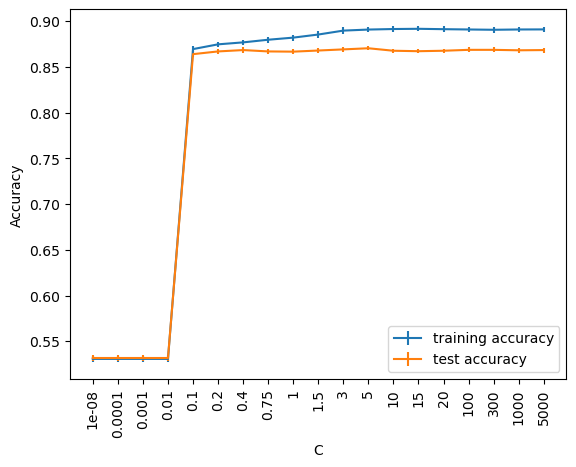

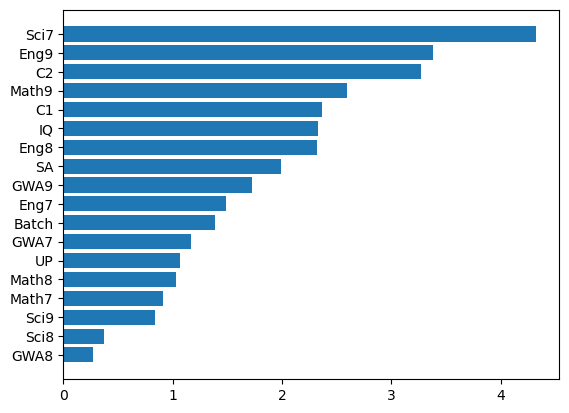

[0.53168317 0.53168317 0.53168317 0.53168317 0.86410891 0.86707921
 0.86856436 0.86707921 0.86683168 0.86806931 0.86930693 0.87054455
 0.86782178 0.86732673 0.86782178 0.86881188 0.86881188 0.86831683
 0.86856436]


['Logistic Regression (l1)',
 'C',
 5,
 0.891006600660066,
 0.8705445544554455,
 0.8910891089108911,
 'Sci7',
 13.602614402770996]

In [196]:
train_logistic(X_train_full_scaled, y_train_full, 'l1')

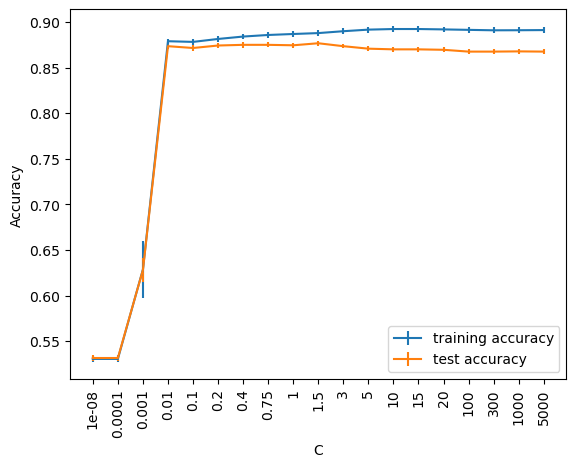

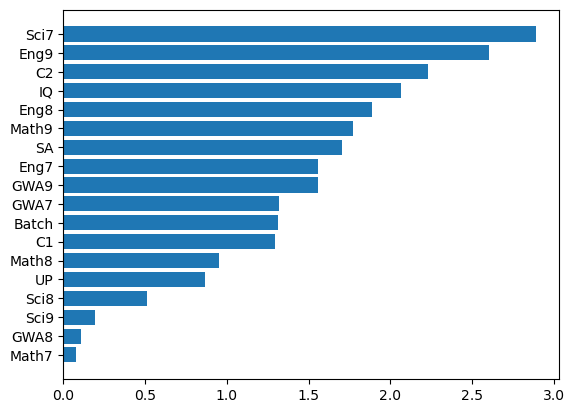

[0.53168317 0.53168317 0.62821782 0.87351485 0.87153465 0.87425743
 0.875      0.875      0.87450495 0.87673267 0.87351485 0.87079208
 0.8700495  0.8700495  0.86955446 0.86757426 0.86757426 0.86782178
 0.86757426]


['Logistic Regression (l2)',
 'C',
 1.5,
 0.8878712871287128,
 0.8767326732673268,
 0.8811881188118812,
 'Sci7',
 5.394617795944214]

In [197]:
train_logistic(X_train_full_scaled, y_train_full, 'l2')

## SVC (Radial Basis Function)

## Random Forest CLF

## Gradient Boosting CLF